In [20]:
import math
import pandas as pd
import numpy as np
from utilities_database import retrieve_data, prepare_database, consult_database
from plots import gaussian
from cdf import norm_cdf

In [2]:
data = pd.read_csv(("../a1_input/jobs_in_data.csv"))
prepare_database("input.db", data, "table")
display(data)

Dataframe stored as *table*


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


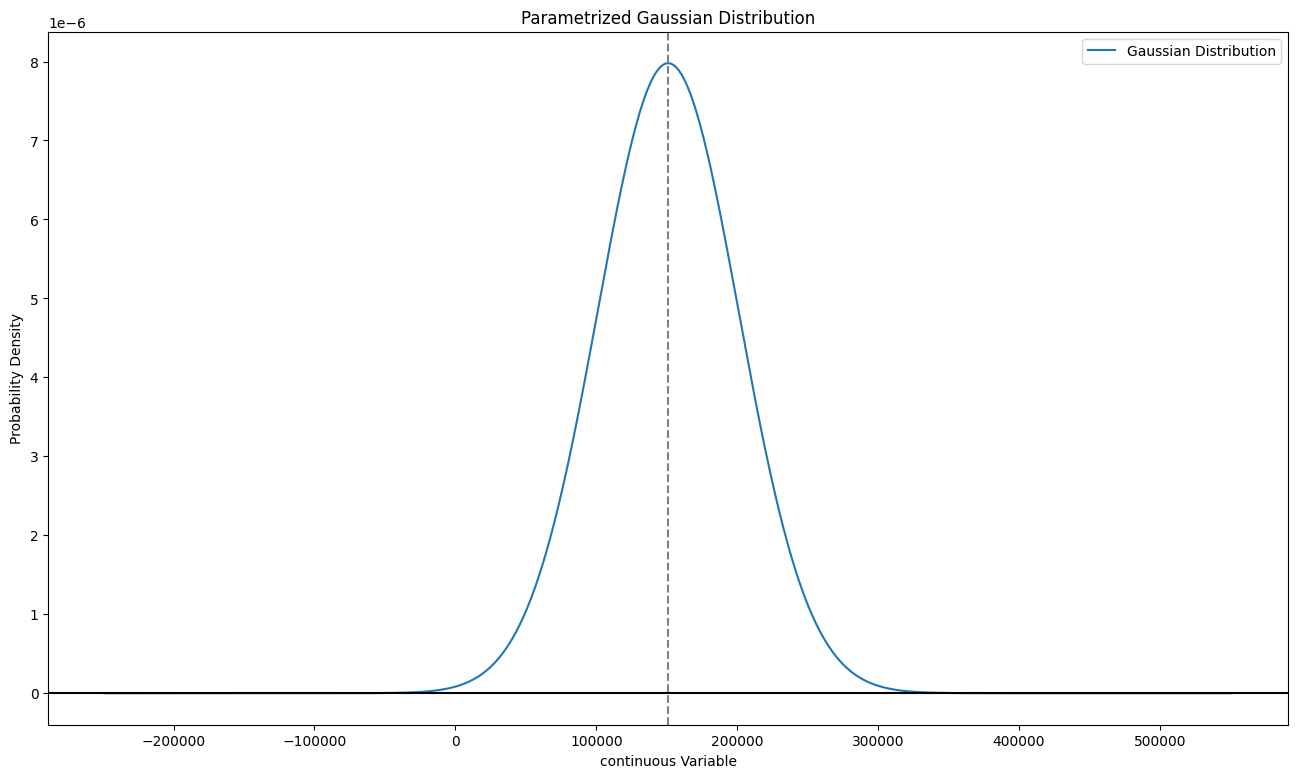

In [3]:
pop_mean = 151000
pop_std = 50000
fig = gaussian(pop_mean, pop_std)

Problem formulation: 
- Null Hypothesis (H0): There is no significant difference in the average salary between mid-level and senior-level employees.
- Alternative Hypothesis (H1): There is a significant difference in the average salary between mid-level and senior-level employees.

In [4]:
alpha = 0.05 

In [9]:
mid_level = pd.DataFrame(data[data['experience_level'].isin(['Mid-level'])].loc[:, "salary_in_usd"])
mid_level.reset_index(drop=True, inplace=True)
mid_level.columns = ["Mid-Level salary"]
display(mid_level)
senior = pd.DataFrame(data[data['experience_level'].isin(['Senior'])].loc[:, "salary_in_usd"])
senior.columns = ["Senior salary"]
mid_level.reset_index(drop=True, inplace=True)
display(senior)

,Mid-Level salary
0,95012
1,224400
2,138700
3,43064
4,36912
...,...
1864,130800
1865,119059
1866,423000
1867,28369


,Senior salary
1,186000
2,81800
3,212000
4,93300
5,130000
...,...
9341,190200
9345,45618
9346,168000
9350,165000


In [57]:
mid_level_mean = mid_level.describe().transpose().iloc[0, 1]
senior_mean = senior.describe().transpose().iloc[0, 1]
row1 = pd.DataFrame([mid_level_mean, senior_mean]).transpose()
mid_level_std = mid_level.describe().transpose().iloc[0, 2]
senior_std = senior.describe().transpose().iloc[0, 2]
row2 = pd.DataFrame([mid_level_std, senior_std]).transpose()
row3 = pd.DataFrame([mid_level.shape[0], senior.shape[0]]).transpose()
table = pd.concat([row1, row2, row3])
table.columns = ["Mid Level", "Senior"]
table.index = ["Mean", "Average", "Sample"]
display(table)

,Mid Level,Senior
Mean,117523.918138,162356.126099
Average,55453.622208,59523.013825
Sample,1869.000000,6709.000000


In [59]:
# Calculate the standard error of the difference between means
standard_error = np.sqrt((mid_level_std**2 / mid_level.shape[0]) + (senior_std**2 / senior.shape[0]))
# Calculate the Z-score
z_score = (mid_level_mean - senior_mean) / standard_error
print(z_score)

-30.410162446245543


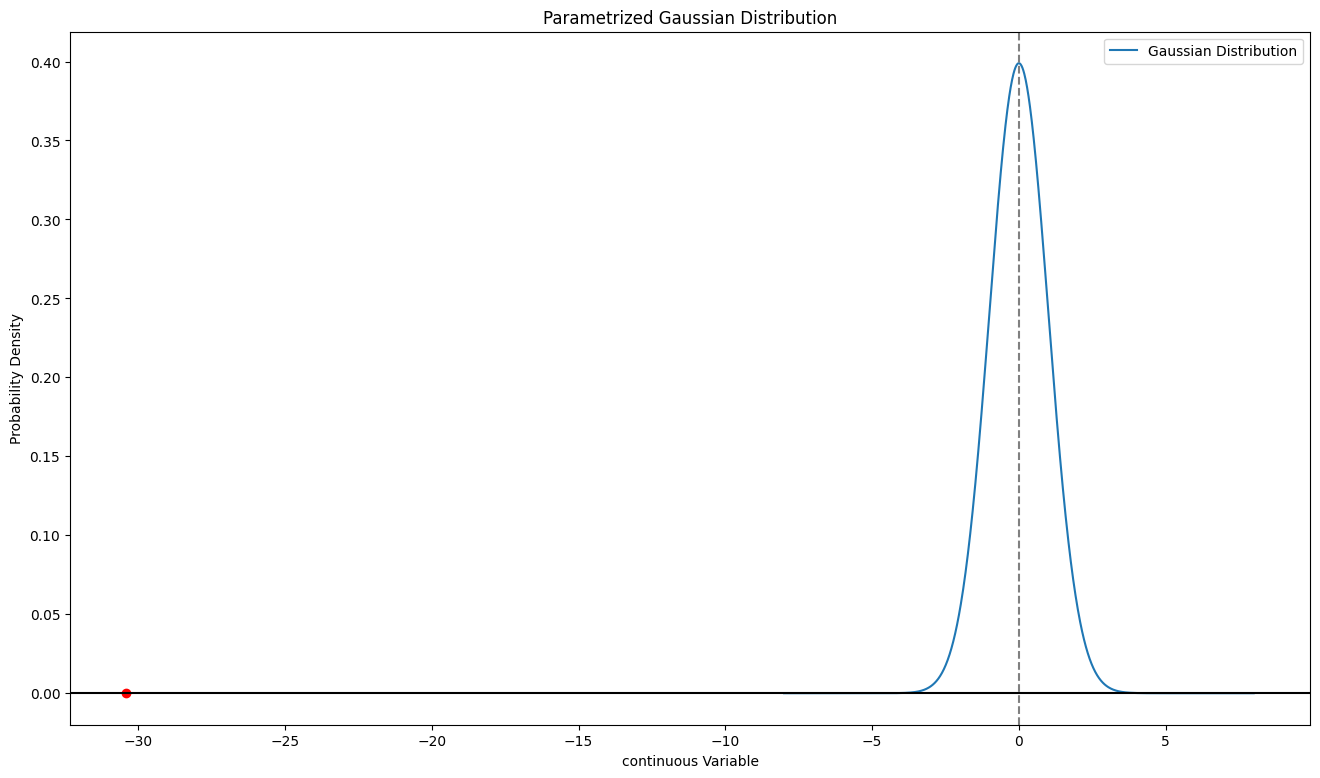

In [60]:
fig = gaussian(0, 1, z_score)

In [62]:
p_value = norm_cdf(z_score, 0 , 1)
print(p_value)

0.0
